# Нейронная сеть с двумя слоями

Постройте нейронную сеть с двумя слоями и обучите её решать задачу классификации.

**После выполнения этого задания вы сможете:**

- Реализовать нейронную сеть с двумя слоями для задачи классификации
- Реализовать прямое распространение с помощью матричного умножения
- Выполнить обратное распространение

# Содержание

- [ 1 - Задача классификации](#1)
- [ 2 - Модель нейронной сети с двумя слоями](#2)
  - [ 2.1 - Модель нейронной сети с двумя слоями для одного обучающего примера](#2.1)
  - [ 2.2 - Модель нейронной сети с двумя слоями для нескольких обучающих примеров](#2.2)
  - [ 2.3 - Функция потерь и обучение](#2.3)
  - [ 2.4 - Набор данных](#2.4)
  - [ 2.5 - Определение функции активации](#2.5)
    - [ Упражнение 1](#ex01)
- [ 3 - Реализация модели нейронной сети с двумя слоями](#3)
  - [ 3.1 - Определение структуры нейронной сети](#3.1)
    - [ Упражнение 2](#ex02)
  - [ 3.2 - Инициализация параметров модели](#3.2)
    - [ Упражнение 3](#ex03)
  - [ 3.3 - Цикл](#3.3)
    - [ Упражнение 4](#ex04)
    - [ Упражнение 5](#ex05)
    - [ Упражнение 6](#ex06)
  - [ 3.4 - Интеграция частей 3.1, 3.2 и 3.3 в nn_model()](#3.4)
    - [ Упражнение 7](#ex07)
    - [ Упражнение 8](#ex08)
- [ 4 - Другой набор данных](#4)

## Пакеты

Сначала импортируем все пакеты, которые нам понадобятся в этом задании.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# Функция для создания набора данных.
from sklearn.datasets import make_blobs

# Результат графических команд отображается напрямую в Jupyter блокноте.
%matplotlib inline 

# Установим начальное значение, чтобы результаты были вопроизводимыми.
np.random.seed(3)

Загрузим модульные тесты, определенные для этого блокнота.

In [2]:
import w3_unittest

<a name='1'></a>
## 1 - Задача классификации

Ранее мы обучали нейронную сеть с одним перцептроном, выполняя прямое и обратное распространение. Этой простой структуры модели было достаточно для решения "линейной" задачи классификации — нахождении прямой в плоскости, которая будет служить границей решения для разделения двух классов.

Представьте, что теперь у вас более сложная задача: у вас все еще есть два класса, но одной прямой будет недостаточно, чтобы их разделить.

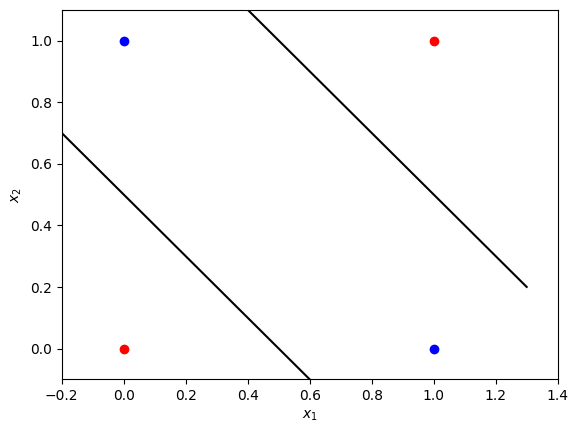

In [3]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
x_line = np.arange(xmin, xmax, 0.1)
# Точки данных (наблюдения) из двух классов.
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="b")
ax.scatter(1, 0, color="b")
ax.scatter(1, 1, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# Пример прямых, которые могут быть использованы в качестве границы решения для разделения двух классов.
ax.plot(x_line, -1 * x_line + 1.5, color="black")
ax.plot(x_line, -1 * x_line + 0.5, color="black")
plt.plot()
plt.show()

Эта логика может присутствовать во многих приложениях. Например, если мы обучим модель предсказывать, следует ли нам покупать дом, зная его размер и год постройки. Большой новый дом не будет доступным, в то время как маленький старый дом не будет стоить покупки. Таким образом, мы можем быть заинтересованы либо в большом старом доме, либо в маленьком новом доме.

Одного перцептрона недостаточно, чтобы решить такую задачу классификации. Давайте посмотрим, как можем адаптировать эту модель, чтобы найти решение.

На графике выше две прямых могут служить границей решения. Наша интуиция подсказывает, что также следует увеличить число перцептронов. И это верно. Нам нужно будет подавать данные (координаты $x_1$, $x_2$) на два узла отдельно, а затем объединить их с другим узлом для принятия решения.

Теперь давайте разберемся с деталями, построим и обучим нашу многослойную нейронную сеть.

<a name='2'></a>
## 2 - Модель нейронной сети с двумя слоями

<a name='2.1'></a>
### 2.1 - Модель нейронной сети с двумя слоями для одного обучающего примера

<img src="images/nn_model_2_layers.png" style="width:1000px;">

Входные и выходные слои нейронной сети такие же, как для модели с одним перцептроном, но теперь между ними есть **скрытый слой**. Обучающие примеры $x^{(i)}=\begin{bmatrix}x_1^{(i)} \\ x_2^{(i)}\end{bmatrix}$ из входного слоя размера $n_x = 2$ сначала подаются на скрытый слой размера $n_h = 2$. Они одновременно подаются на первый перцептрон с весами $W_1^{[1]}=\begin{bmatrix}w_{1,1}^{[1]} & w_{2,1}^{[1]}\end{bmatrix}$, смещение $b_1^{[1]}$; и на второй перцептрон с весами $W_2^{[1]}=\begin{bmatrix}w_{1,2}^{[1]} & w_{2,2}^{[1]}\end{bmatrix}$, смещение $b_2^{[1]}$. Целое число в квадратных скобках $^{[1]}$ указывает номер слоя, поскольку теперь есть два слоя с их собственными параметрами и выводами, которые необходимо различать.

\begin{align}
z_1^{[1](i)} &= w_{1,1}^{[1]} x_1^{(i)} + w_{2,1}^{[1]} x_2^{(i)} + b_1^{[1]} = W_1^{[1]}x^{(i)} + b_1^{[1]},\\
z_2^{[1](i)} &= w_{1,2}^{[1]} x_1^{(i)} + w_{2,2}^{[1]} x_2^{(i)} + b_2^{[1]} = W_2^{[1]}x^{(i)} + b_2^{[1]}.\tag{1}
\end{align}

Эти выражения для одного обучающего примера $x^{(i)}$ могут быть переписаны в матричной форме:

$$z^{[1](i)} = W^{[1]} x^{(i)} + b^{[1]},\tag{2}$$

где 

&emsp; &emsp; $z^{[1](i)} = \begin{bmatrix}z_1^{[1](i)} \\ z_2^{[1](i)}\end{bmatrix}$ — вектор размера $\left(n_h \times 1\right) = \left(2 \times 1\right)$; 

&emsp; &emsp; $W^{[1]} = \begin{bmatrix}W_1^{[1]} \\ W_2^{[1]}\end{bmatrix} = 
\begin{bmatrix}w_{1,1}^{[1]} & w_{2,1}^{[1]} \\ w_{1,2}^{[1]} & w_{2,2}^{[1]}\end{bmatrix}$ — матрица размера $\left(n_h \times n_x\right) = \left(2 \times 2\right)$;

&emsp; &emsp; $b^{[1]} = \begin{bmatrix}b_1^{[1]} \\ b_2^{[1]}\end{bmatrix}$ — вектор размера $\left(n_h \times 1\right) = \left(2 \times 1\right)$.

Далее необходимо применить функцию активации скрытого слоя для каждого из элементов вектора $z^{[1](i)}$. Здесь можно использовать различные функции активации, и в этой модели мы возьмем сигмоидальную функцию $\sigma\left(x\right) = \frac{1}{1 + e^{-x}}$. Помните, что её производная равна $\frac{d\sigma}{dx} = \sigma\left(x\right)\left(1-\sigma\left(x\right)\right)$. Выход скрытого слоя — это вектор размера $\left(n_h \times 1\right) = \left(2 \times 1\right)$:

$$a^{[1](i)} = \sigma\left(z^{[1](i)}\right) = 
\begin{bmatrix}\sigma\left(z_1^{[1](i)}\right) \\ \sigma\left(z_2^{[1](i)}\right)\end{bmatrix}.\tag{3}$$

Затем выход скрытого слоя подается на выходной слой размера $n_y = 1$. Это было рассмотрено в предыдущем задании, единственные различия заключаются в том, что $a^{[1](i)}$ берется вместо $x^{(i)}$ и появляется обозначение слоя $^{[2]}$, чтобы идентифицировать все параметры и выходы:

$$z^{[2](i)} = w_1^{[2]} a_1^{[1](i)} + w_2^{[2]} a_2^{[1](i)} + b^{[2]}= W^{[2]} a^{[1](i)} + b^{[2]},\tag{4}$$

&emsp; &emsp; $z^{[2](i)}$ и $b^{[2]}$ являются скалярами для этой модели, так как $\left(n_y \times 1\right) = \left(1 \times 1\right)$;

&emsp; &emsp; $W^{[2]} = \begin{bmatrix}w_1^{[2]} & w_2^{[2]}\end{bmatrix}$ — вектор размера $\left(n_y \times n_h\right) = \left(1 \times 2\right)$.

Наконец, та же сигмоидальная функция используется в качестве функции активации выходного слоя:

$$a^{[2](i)} = \sigma\left(z^{[2](i)}\right).\tag{5}$$

В математическом смысле модель нейронной сети с двумя слоями для каждого обучающего примера $x^{(i)}$ может быть записана с использованием выражений $(2) - (5)$. Давайте перепишем их рядом друг с другом для удобства:

\begin{align}
z^{[1](i)} &= W^{[1]} x^{(i)} + b^{[1]},\\
a^{[1](i)} &= \sigma\left(z^{[1](i)}\right),\\
z^{[2](i)} &= W^{[2]} a^{[1](i)} + b^{[2]},\\
a^{[2](i)} &= \sigma\left(z^{[2](i)}\right).\\
\tag{6}
\end{align}

Обратите внимание, что все параметры, которые должны быть обучены в модели, записаны без индекса $^{(i)}$ — они независимы от входных данных.

Наконец, предсказания для некоторого примера $x^{(i)}$ могут быть сделаны, принимая выход $a^{[2](i)}$ и вычисляя $\hat{y}$ следующим образом: $\hat{y} = \begin{cases} 1 & \mbox{если } a^{[2](i)} > 0.5, \\ 0 & \mbox{в противном случае }. \end{cases}$.

<a name='2.2'></a>
### 2.2 - Модель нейронной сети с двумя слоями для нескольких обучающих примеров

Аналогично модели с одним перцептроном, $m$ обучающих примеров могут быть занесены в матрице $X$ размера ($2 \times m$), помещая $x^{(i)}$ в столбцы. Затем модель $(6)$ может быть переписана в терминах матричных умножений:

\begin{align}
Z^{[1]} &= W^{[1]} X + b^{[1]},\\
A^{[1]} &= \sigma\left(Z^{[1]}\right),\\
Z^{[2]} &= W^{[2]} A^{[1]} + b^{[2]},\\
A^{[2]} &= \sigma\left(Z^{[2]}\right),\\
\tag{7}
\end{align}

где $b^{[1]}$ расширяется до матрицы размера $\left(n_h \times m\right) = \left(2 \times m\right)$, а $b^{[2]}$ — до вектора размера $\left(n_y \times m\right) = \left(1 \times m\right)$. Это хорошее упражнение для нас — посмотреть на выражения $(7)$ и проверить, что размеры матриц действительно соответствуют для выполнения необходимых умножений.

Мы вывели выражения для выполнения прямого распространения. Время оценить нашу модель и обучить её.

<a name='2.3'></a>
### 2.3 - Функция потерь и обучение

Для оценки этой простой нейронной сети мы можем использовать ту же функцию потерь, что и в случае с одним перцептроном — логарифмическую функцию потерь. Изначально инициализированные веса были просто случайными значениями; теперь нам нужно обучить модель: найти такой набор параметров $W^{[1]}$, $b^{[1]}$, $W^{[2]}$, $b^{[2]}$, который минимизирует функцию потерь.

Как и в предыдущем примере с нейронной сетью с одним перцептроном, функция потерь может быть записана как:

$$\mathcal{L}\left(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}\right) = \frac{1}{m}\sum_{i=1}^{m} L\left(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}\right) =  \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small - y^{(i)}\log\left(a^{[2](i)}\right) - (1-y^{(i)})\log\left(1- a^{[2](i)}\right)  \large  \right), \small\tag{8}$$

где $y^{(i)} \in \{0,1\}$ — это исходные метки, а $a^{[2](i)}$ — это непрерывные выходные значения шага прямого распространения (элементы массива $A^{[2]}$).

Чтобы минимизировать это, мы можем использовать градиентный спуск, обновляя параметры по следующим выражениям:

\begin{align}
W^{[1]} &= W^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[1]} },\\
b^{[1]} &= b^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[1]} },\\
W^{[2]} &= W^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[2]} },\\
b^{[2]} &= b^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[2]} },\\
\tag{9}
\end{align}

где $\alpha$ — скорость обучения.

Для выполнения обучения модели нам нужно теперь вычислить $\frac{\partial \mathcal{L} }{ \partial W^{[1]}}$, $\frac{\partial \mathcal{L} }{ \partial b^{[1]}}$, $\frac{\partial \mathcal{L} }{ \partial W^{[2]}}$, $\frac{\partial \mathcal{L} }{ \partial b^{[2]}}$.

Начнем с конца нейронной сети. Мы можем переписать здесь соответствующие выражения для $\frac{\partial \mathcal{L} }{ \partial W }$ и $\frac{\partial \mathcal{L} }{ \partial b }$ из нейронной сети с одним перцептроном:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W } &= 
\frac{1}{m}\left(A-Y\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\left(A-Y\right)\mathbf{1},\\
\end{align}

где $\mathbf{1}$ — это просто ($m \times 1$) вектор единиц. Наш один перцептрон теперь во втором слое, поэтому $W$ заменяется на $W^{[2]}$, $b$ на $b^{[2]}$, $A$ на $A^{[2]}$, а $X$ на $A^{[1]}$:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\left(A^{[1]}\right)^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\mathbf{1}.\\
\tag{10}
\end{align}


Давайте теперь найдем $\frac{\partial \mathcal{L} }{ \partial W^{[1]}} = 
\begin{bmatrix}
\frac{\partial \mathcal{L} }{ \partial w_{1,1}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,1}^{[1]}} \\
\frac{\partial \mathcal{L} }{ \partial w_{1,2}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,2}^{[1]}} \end{bmatrix}$. Согласно математическому выводу, $$\frac{\partial \mathcal{L} }{ \partial w_{1,1}^{[1]}}=\frac{1}{m}\sum_{i=1}^{m} \left( 
\left(a^{[2](i)} - y^{(i)}\right) 
w_1^{[2]} 
\left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_1^{(i)}\right)\tag{11}$$

Если сделаем это точно для каждого из элементов $\frac{\partial \mathcal{L} }{ \partial W^{[1]}}$, то получим следующую матрицу:

$$\frac{\partial \mathcal{L} }{ \partial W^{[1]}} = \begin{bmatrix}
\frac{\partial \mathcal{L} }{ \partial w_{1,1}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,1}^{[1]}} \\
\frac{\partial \mathcal{L} }{ \partial w_{1,2}^{[1]}} & \frac{\partial \mathcal{L} }{ \partial w_{2,2}^{[1]}} \end{bmatrix}$$
$$= \frac{1}{m}\begin{bmatrix}
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_1^{(i)}\right) & 
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_2^{(i)}\right)  \\
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_1^{(i)}\right) & 
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_2^{(i)}\right)\end{bmatrix}\tag{12}$$

Смотря на запись, можно заметить, что все составляющие и индексы довольно консистенты, так что всё это можно объединить в матричную форму. И это так. $\left(W^{[2]}\right)^T = \begin{bmatrix}w_1^{[2]} \\ w_2^{[2]}\end{bmatrix}$ размера $\left(n_h \times n_y\right) = \left(2 \times 1\right)$ может быть умножен на вектор $A^{[2]} - Y$ размера $\left(n_y \times m\right) = \left(1 \times m\right)$, в результате получив матрицу размера $\left(n_h \times m\right) = \left(2 \times m\right)$:

$$\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)=
\begin{bmatrix}w_1^{[2]} \\ w_2^{[2]}\end{bmatrix}
\begin{bmatrix}\left(a^{[2](1)} - y^{(1)}\right) &  \cdots & \left(a^{[2](m)} - y^{(m)}\right)\end{bmatrix}
=\begin{bmatrix}
\left(a^{[2](1)} - y^{(1)}\right) w_1^{[2]} & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_1^{[2]} \\
\left(a^{[2](1)} - y^{(1)}\right) w_2^{[2]} & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_2^{[2]} \end{bmatrix}$$.

Теперь, взяв матрицу $A^{[1]}$ того же размера $\left(n_h \times m\right) = \left(2 \times m\right)$,

$$A^{[1]}
=\begin{bmatrix}
a_1^{[1](1)} & \cdots & a_1^{[1](m)} \\
a_2^{[1](1)} & \cdots & a_2^{[1](m)} \end{bmatrix},$$

можно рассчитать:

$$A^{[1]}\cdot\left(1-A^{[1]}\right)
=\begin{bmatrix}
a_1^{[1](1)}\left(1 - a_1^{[1](1)}\right) & \cdots & a_1^{[1](m)}\left(1 - a_1^{[1](m)}\right) \\
a_2^{[1](1)}\left(1 - a_2^{[1](1)}\right) & \cdots & a_2^{[1](m)}\left(1 - a_2^{[1](m)}\right) \end{bmatrix},$$

где "$\cdot$" обозначает **поэлементное** умножение.

С помощью поэлементного умножения,

$$\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)=\begin{bmatrix}
\left(a^{[2](1)} - y^{(1)}\right) w_1^{[2]}\left(a_1^{[1](1)}\left(1 - a_1^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_1^{[2]}\left(a_1^{[1](m)}\left(1 - a_1^{[1](m)}\right)\right) \\
\left(a^{[2](1)} - y^{(1)}\right) w_2^{[2]}\left(a_2^{[1](1)}\left(1 - a_2^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_2^{[2]} \left(a_2^{[1](m)}\left(1 - a_2^{[1](m)}\right)\right) \end{bmatrix}.$$

Если мы выполним матричное умножение с $X^T$ размера $\left(m \times n_x\right) = \left(m \times 2\right)$, то получим матрицу размера $\left(n_h \times n_x\right) = \left(2 \times 2\right)$:

$$\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T = 
\begin{bmatrix}
\left(a^{[2](1)} - y^{(1)}\right) w_1^{[2]}\left(a_1^{[1](1)}\left(1 - a_1^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_1^{[2]}\left(a_1^{[1](m)}\left(1 - a_1^{[1](m)}\right)\right) \\
\left(a^{[2](1)} - y^{(1)}\right) w_2^{[2]}\left(a_2^{[1](1)}\left(1 - a_2^{[1](1)}\right)\right) & \cdots & \left(a^{[2](m)} - y^{(m)}\right) w_2^{[2]} \left(a_2^{[1](m)}\left(1 - a_2^{[1](m)}\right)\right) \end{bmatrix}
\begin{bmatrix}
x_1^{(1)} & x_2^{(1)} \\
\cdots & \cdots \\
x_1^{(m)} & x_2^{(m)}
\end{bmatrix}$$
$$=\begin{bmatrix}
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1 - a_1^{[1](i)}\right) \right)
x_1^{(i)}\right) & 
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_1^{[2]} \left(a_1^{[1](i)}\left(1-a_1^{[1](i)}\right)\right)
x_2^{(i)}\right)  \\
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_1^{(i)}\right) & 
\sum_{i=1}^{m} \left( \left(a^{[2](i)} - y^{(i)}\right) w_2^{[2]} \left(a_2^{[1](i)}\left(1-a_2^{[1](i)}\right)\right)
x_2^{(i)}\right)\end{bmatrix}$$

Это точно так же, как в выражении $(12)$! Таким образом, $\frac{\partial \mathcal{L} }{ \partial W^{[1]}}$ можно записать как смесь умножений:

$$\frac{\partial \mathcal{L} }{ \partial W^{[1]}} = \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T\tag{13},$$

где "$\cdot$" обозначает поэлементные умножения.

Вектор $\frac{\partial \mathcal{L} }{ \partial b^{[1]}}$ можно найти аналогичным образом, но последние составляющие в правиле цепочки будут равны $1$, т.е. $\frac{\partial z_1^{[1](i)}}{ \partial b_1^{[1]}} = 1$. Таким образом,

$$\frac{\partial \mathcal{L} }{ \partial b^{[1]}} = \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)\mathbf{1},\tag{14}$$

где $\mathbf{1}$ — это ($m \times 1$) вектор единиц.

Выражения $(10)$, $(13)$ и $(14)$ могут быть использованы для обновления параметров $(9)$ при выполнении обратного распространения:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\left(A^{[1]}\right)^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\mathbf{1},\\
\frac{\partial \mathcal{L} }{ \partial W^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)\mathbf{1},\\
\tag{15}
\end{align}

где $\mathbf{1}$ — это ($m \times 1$) вектор единиц.

Итак, чтобы понять глубоко и правильно, как работают нейронные сети и как они обучаются, **нам действительно нужно комбинированное знание линейной алгебры и математического анализа**. Но не волнуйтесь. В целом это не так страшно, если мы будем делать это шаг за шагом, точно понимая математику.

Время реализовать все это в коде.

<a name='2.2'></a>
### 2.2 - Набор данных

Сначала давайте получим набор данных, с которым мы будем работать. Следующий код создаст $m=2000$ точек данных $(x_1, x_2)$ и сохранит их в массиве `NumPy` `X` размера $(2 \times m)$ (в столбцах массива). Метки ($0$: синий, $1$: красный) будут сохранены в массиве `NumPy` `Y` размера $(1 \times m)$.

Форма X: (2, 2000)
Форма Y: (1, 2000)
У нас есть m = 2000 обучающих примеров!


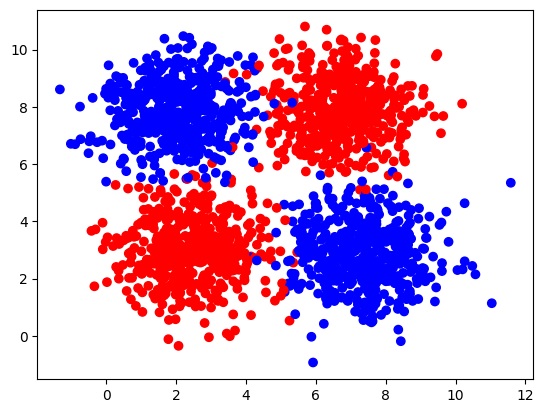

In [4]:
m = 2000
samples, labels = make_blobs(n_samples=m, 
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]), 
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0) | (labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 0
X = np.transpose(samples)
Y = labels.reshape((1, m))

plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

print('Форма X: ' + str(X.shape))
print('Форма Y: ' + str(Y.shape))
print('У нас есть m = %d обучающих примеров!' % (m))

<a name='2.3'></a>
### 2.3 - Определение функции активации

<a name='ex01'></a>
### Упражнение 1

Определите сигмоидальную функцию активации $\sigma\left(z\right) =\frac{1}{1+e^{-z}} $.

In [5]:
def sigmoid(z):
    ### START CODE HERE ### (~ 1 line of code)
    # res = None
    res= 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return res

In [6]:
print("sigmoid(-2) = " + str(sigmoid(-2)))
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(3.5) = " + str(sigmoid(3.5)))

sigmoid(-2) = 0.11920292202211755
sigmoid(0) = 0.5
sigmoid(3.5) = 0.9706877692486436


##### __Ожидаемый вывод__

Примечание: значения могут отличаться в последних десятичных знаках.

```Python
sigmoid(-2) = 0.11920292202211755
sigmoid(0) = 0.5
sigmoid(3.5) = 0.9706877692486436
```

In [7]:
w3_unittest.test_sigmoid(sigmoid)

 All tests passed


<a name='3'></a>
## 3 - Реализация модели нейронной сети с двумя слоями

<a name='3.1'></a>
### 3.1 - Определение структуры нейронной сети

<a name='ex02'></a>
### Упражнение 2

Определите три переменные:
- `n_x`: размер входного слоя
- `n_h`: размер скрытого слоя (пока установите его равным 2)
- `n_y`: размер выходного слоя

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Совет</b></font>
</summary>
<p>
<ul>
    Используйте размеры X и Y, чтобы найти n_x и n_y:
    <li>размер входного слоя n_x равен размеру входных векторов, размещенных в столбцах массива X,</li>
    <li>выходы для каждого из обучающих примеров будут храниться в столбцах массива Y.</li>
</ul>
</p>

In [8]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- входной набор данных формы (размер входа, число примеров)
    Y -- метки формы (размер выхода, число примеров)
    
    Returns:
    n_x -- размер входного слоя
    n_h -- размер скрытого слоя
    n_y -- размер выходного слоя
    """
    # Размер входного слоя.
    n_x = X.shape[0]
    # Размер скрытого слоя.
    n_h = 2
    # Размер выходного слоя.
    n_y = Y.shape[0]

    return (n_x, n_h, n_y)

In [9]:
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("Размер входного слоя: n_x = " + str(n_x))
print("Размер скрытого слоя: n_h = " + str(n_h))
print("Размер выходного слоя: n_y = " + str(n_y))

Размер входного слоя: n_x = 2
Размер скрытого слоя: n_h = 2
Размер выходного слоя: n_y = 1


##### __Ожидаемый вывод__

```Python
Размер входного слоя: n_x = 2
Размер скрытого слоя: n_h = 2
Размер выходного слоя: n_y = 1
```

In [10]:
w3_unittest.test_layer_sizes(layer_sizes)

 All tests passed


<a name='3.2'></a>
### 3.2 - Инициализация параметров модели

<a name='ex03'></a>
### Упражнение 3

Реализуйте функцию `initialize_parameters()`.

**Инструкции**:
- Убедитесь, что размеры ваших параметров правильные. При необходимости обратитесь к рисунку нейронной сети выше.
- Вы будете инициализировать матрицу весов случайными значениями.
    - Используйте: `np.random.randn(a,b) * 0.01` для инициализации матрицы размера (a,b).
- Вы будете инициализировать вектор смещения нулями.
    - Используйте: `np.zeros((a,b))` для инициализации матрицы размера (a,b) нулями.

In [11]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Аргумент:
    n_x -- размер входного слоя
    n_h -- размер скрытого слоя
    n_y -- размер выходного слоя
    
    Returns:
    params -- словарь Python, содержащий ваши параметры:
                    W1 -- матрица весов размера (n_h, n_x)
                    b1 -- вектор смещения размера (n_h, 1)
                    W2 -- матрица весов размера (n_y, n_h)
                    b2 -- вектор смещения размера (n_y, 1)
    """
    W1 = np.random.randn(n_h, n_x) * 0.01 
    b1 = np.zeros((n_h, 1)) 
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1)) 
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [12]:
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651 ]
 [ 0.00096497 -0.01863493]]
b1 = [[0.]
 [0.]]
W2 = [[-0.00277388 -0.00354759]]
b2 = [[0.]]


##### __Ожидаемый вывод__ 
Примечание: элементы массивов W1 и W2 могут отличаться из-за случайной инициализации. Вы можете попробовать перезапустить ядро, чтобы получить одинаковые значения.

```Python
W1 = [[ 0.01788628  0.0043651 ]
 [ 0.00096497 -0.01863493]]
b1 = [[0.]
 [0.]]
W2 = [[-0.00277388 -0.00354759]]
b2 = [[0.]]
```

In [13]:
# Примечание: 
# Фактические значения здесь не проверяются в юнит-тестах (из-за случайной инициализации).
w3_unittest.test_initialize_parameters(initialize_parameters)

 All tests passed


<a name='3.3'></a>
### 3.3 - Цикл

<a name='ex04'></a>
### Упражнение 4

Реализуйте `forward_propagation()`.

**Инструкции**:
- Посмотрите выше на математическое представление $(7)$ вашего классификатора (раздел [2.2](#2.2)):
\begin{align}
Z^{[1]} &= W^{[1]} X + b^{[1]},\\
A^{[1]} &= \sigma\left(Z^{[1]}\right),\\
Z^{[2]} &= W^{[2]} A^{[1]} + b^{[2]},\\
A^{[2]} &= \sigma\left(Z^{[2]}\right).\\
\end{align}
- Шаги, которые нужно реализовать:
    1. Извлеките каждый параметр из словаря "parameters" (который является выходом `initialize_parameters()`) с использованием `parameters[".."]`.
    2. Реализуйте прямое распространение. Вычислите `Z1`, умножив матрицы `W1`, `X` и добавив вектор `b1`. Затем найдите `A1` с использованием функции активации `sigmoid`. Выполните аналогичные вычисления для `Z2` и `A2`.

In [14]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Аргумент:
    X -- входные данные размера (n_x, m)
    parameters -- словарь Python, содержащий ваши параметры (выход функции инициализации)
    
    Returns:
    A2 -- сигмоидальный выход второго активационного слоя
    cache -- словарь Python, содержащий Z1, A1, Z2, A2 
    (это упрощает вычисления на этапе обратного распространения)
    """
    # Извлечение каждого параметра из словаря "parameters".
    ### START CODE HERE ### (~ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    
    # Реализуем прямое распространение для вычисления A2.
    ### START CODE HERE ### (~ 4 lines of code)
    Z1 = np.dot(W1, X) + b1  # Вычисляем Z1
    A1 = sigmoid(Z1)         # Применяем сигмоидальную функцию активации к Z1
    Z2 = np.dot(W2, A1) + b2  # Вычисляем Z2
    A2 = sigmoid(Z2)   # Применяем сигмоидальную функцию активации к Z2
    ### END CODE HERE ###
    
    assert(A2.shape == (n_y, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [15]:
A2, cache = forward_propagation(X, parameters)

print(A2)

[[0.49920157 0.49922234 0.49921223 ... 0.49921215 0.49921043 0.49920665]]


##### __Ожидаемый вывод__ 
Примечание: элементы массива A2 могут отличаться в зависимости от начальных параметров. Если вы хотите получить точно такой же вывод, попробуйте перезапустить ядро и снова выполнить блокнот.

```Python
[[0.49920157 0.49922234 0.49921223 ... 0.49921215 0.49921043 0.49920665]]
```

In [17]:
# Примечание: 
# Фактические значения не проверяются здесь в юнит-тестах (из-за случайной инициализации).
w3_unittest.test_forward_propagation(forward_propagation)

Test case "default_check". Wrong output of Z2. Test for i = 0. 
	Expected: 
-0.003193737045395555
	Got: 
-0.0031937370453955552
Test case "default_check". Wrong output of Z2. Test for i = 400. 
	Expected: 
-0.0032219246882993964
	Got: 
-0.003221924688299396
Test case "change_weights_check". Wrong output of Z2. Test for i = 0. 
	Expected: 
-0.002107353022689117
	Got: 
-0.0021073530226891177
Test case "change_weights_check". Wrong output of Z2. Test for i = 400. 
	Expected: 
-0.0021102856901919777
	Got: 
-0.002110285690191978
Test case "change_weights_check". Wrong output of Z2. Test for i = 1999. 
	Expected: 
-0.002064456214373386
	Got: 
-0.0020644562143733868
Test case "change_dataset_check". Wrong output of Z2. Test for i = 1. 
	Expected: 
-0.00214446629671032
	Got: 
-0.0021444662967103198
 42  Tests passed
 6  Tests failed


Помните, что ваши веса были только инициализированы некоторыми случайными значениями, поэтому модель ещё не обучена.

<a name='ex05'></a>
### Упражнение 5

Определите функцию потерь $(8)$, которая будет использоваться для обучения модели:

$$\mathcal{L}\left(W, b\right)  = \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small - y^{(i)}\log\left(a^{(i)}\right) - (1-y^{(i)})\log\left(1- a^{(i)}\right)  \large  \right) \small.$$

In [18]:
def compute_cost(A2, Y):
    """
    Вычисляет логарифмическую функцию потерь
    
    Arguments:
    A2 -- Выход нейронной сети размером (1, количество примеров)
    Y -- Вектор "истинных" меток размером (1, количество примеров)
    
    Returns:
    cost -- логарифмическая функция потерь
    
    """
    # Количество примеров.
    m = Y.shape[1]
    
    ### START CODE HERE ### (~ 2 lines of code)
    logloss = - (Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    cost = np.sum(logloss) / m  # Средняя стоимость
    ### END CODE HERE ###

    assert(isinstance(cost, float))
    
    return cost

In [19]:
print("cost = " + str(compute_cost(A2, Y)))

cost = 0.6931477703826822


##### __Ожидаемый результат__ 
Примечание: элементы массивов W1 и W2 могут отличаться!

```Python
cost = 0.6931477703826823
```

In [20]:
# Примечание: 
# Фактические значения не проверяются здесь в юнит-тестах (из-за случайной инициализации).
w3_unittest.test_compute_cost(compute_cost, A2)

 All tests passed


Вычислите частные производные, как показано в $(15)$:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\left(A^{[1]}\right)^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[2]} } &= 
\frac{1}{m}\left(A^{[2]}-Y\right)\mathbf{1},\\
\frac{\partial \mathcal{L} }{ \partial W^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b^{[1]}} &= \frac{1}{m}\left(\left(W^{[2]}\right)^T \left(A^{[2]} - Y\right)\cdot \left(A^{[1]}\cdot\left(1-A^{[1]}\right)\right)\right)\mathbf{1}.\\
\end{align}

In [21]:
def backward_propagation(parameters, cache, X, Y):
    """
    Реализует обратное распространение, вычисляя градиенты
    
    Arguments:
    parameters -- словарь python, содержащий наши параметры 
    cache -- словарь python, содержащий Z1, A1, Z2, A2
    X -- входные данные размером (n_x, количество примеров)
    Y -- вектор "истинных" меток размером (n_y, количество примеров)
    
    Returns:
    grads -- словарь python, содержащий градиенты по различным параметрам
    """
    m = X.shape[1]
    
    # Сначала извлекаем W из словаря "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    # Также извлекаем A1 и A2 из словаря "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Обратное распространение: вычисляем частные производные, обозначенные как dW1, db1, dW2, db2 для упрощения. 
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

grads = backward_propagation(parameters, cache, X, Y)

print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

dW1 = [[-1.49856632e-05  1.67791519e-05]
 [-2.12394543e-05  2.43895135e-05]]
db1 = [[5.11207671e-07]
 [7.06236219e-07]]
dW2 = [[-0.00032641 -0.0002606 ]]
db2 = [[-0.00078732]]


<a name='ex06'></a>
### Упражнение 6

Реализуйте `update_parameters()`.

**Инструкции**:
- Обновите параметры, как показано в $(9)$ (раздел [2.3](#2.3)):
\begin{align}
W^{[1]} &= W^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[1]} },\\
b^{[1]} &= b^{[1]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[1]} },\\
W^{[2]} &= W^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial W^{[2]} },\\
b^{[2]} &= b^{[2]} - \alpha \frac{\partial \mathcal{L} }{ \partial b^{[2]} }.\\
\end{align}
- Шаги, которые необходимо реализовать:
    1. Извлеките каждый параметр из словаря "parameters" (который является выходом `initialize_parameters()`) с помощью `parameters[".."]`.
    2. Извлеките каждую производную из словаря "grads" (который является выходом `backward_propagation()`) с помощью `grads[".."]`.
    3. Обновите параметры.

In [22]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Обновляет параметры, используя правило обновления градиентного спуска
    
    Arguments:
    parameters -- словарь python, содержащий параметры 
    grads -- словарь python, содержащий градиенты
    learning_rate -- скорость обучения для градиентного спуска
    
    Returns:
    parameters -- словарь python, содержащий обновленные параметры 
    """
    # Извлекаем каждый параметр из словаря "parameters".
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Извлекаем каждый градиент из словаря "grads".
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Правило обновления для каждого параметра.
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters

In [23]:
parameters_updated = update_parameters(parameters, grads)

print("W1 updated = " + str(parameters_updated["W1"]))
print("b1 updated = " + str(parameters_updated["b1"]))
print("W2 updated = " + str(parameters_updated["W2"]))
print("b2 updated = " + str(parameters_updated["b2"]))

W1 updated = [[ 0.01790427  0.00434496]
 [ 0.00099046 -0.01866419]]
b1 updated = [[-6.13449205e-07]
 [-8.47483463e-07]]
W2 updated = [[-0.00238219 -0.00323487]]
b2 updated = [[0.00094478]]


##### __Ожидаемый результат__ 
Примечание: фактические значения могут отличаться!

```Python
W1 updated = [[ 0.01790427  0.00434496]
 [ 0.00099046 -0.01866419]]
b1 updated = [[-6.13449205e-07]
 [-8.47483463e-07]]
W2 updated = [[-0.00238219 -0.00323487]]
b2 updated = [[0.00094478]]
```

In [24]:
w3_unittest.test_update_parameters(update_parameters)

 All tests passed


<a name='3.4'></a>
### 3.4 - Интегрируйте части 3.1, 3.2 и 3.3 в nn_model()

<a name='ex07'></a>
### Упражнение 7

Создайте модель нейронной сети в `nn_model()`.

**Инструкции**: Модель нейронной сети должна использовать предыдущие функции в правильном порядке.

In [25]:
def nn_model(X, Y, n_h, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- набор данных размером (n_x, количество примеров)
    Y -- метки размером (n_y, количество примеров)
    num_iterations -- количество итераций в цикле
    learning_rate -- параметр скорости обучения для градиентного спуска
    print_cost -- если True, выводим функцию потерь на каждой итерации
    
    Returns:
    parameters -- параметры обученной модели. Затем их можно использовать для предсказания.
    """
    
    n_x = layer_sizes(X, Y)[0]  # Размер входного слоя
    n_y = layer_sizes(X, Y)[2]  # Размер выходного слоя
    
    # Инициализация параметров.
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Цикл.
    for i in range(0, num_iterations):
         
        # Прямое распространение. Входы: "X, параметры". Выходы: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Функция потерь. Входы: "A2, Y". Выходы: "cost".
        cost = compute_cost(A2, Y)
        
        # Обратное распространение. Входы: "parameters, cache, X, Y". Выходы: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Обновление параметров градиентного спуска. Входы: "parameters, grads, learning_rate". Выходы: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Печатаем функцию потерь на каждой итерации.
        if print_cost and i % 100 == 0:  # Печатаем каждые 100 итераций
            print("Функция потерь после итерации %i: %f" % (i, cost))

    return parameters
    


In [26]:
parameters = nn_model(X, Y, n_h=2, num_iterations=3000, learning_rate=1.2, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

Функция потерь после итерации 0: 0.693166
Функция потерь после итерации 100: 0.693141
Функция потерь после итерации 200: 0.693075
Функция потерь после итерации 300: 0.593086
Функция потерь после итерации 400: 0.278265
Функция потерь после итерации 500: 0.217228
Функция потерь после итерации 600: 0.208757
Функция потерь после итерации 700: 0.193522
Функция потерь после итерации 800: 0.195063
Функция потерь после итерации 900: 0.190612
Функция потерь после итерации 1000: 0.190118
Функция потерь после итерации 1100: 0.236872
Функция потерь после итерации 1200: 0.189982
Функция потерь после итерации 1300: 0.189506
Функция потерь после итерации 1400: 0.190124
Функция потерь после итерации 1500: 0.190970
Функция потерь после итерации 1600: 0.191417
Функция потерь после итерации 1700: 0.191284
Функция потерь после итерации 1800: 0.190240
Функция потерь после итерации 1900: 0.188948
Функция потерь после итерации 2000: 0.187791
Функция потерь после итерации 2100: 0.191137
Функция потерь после и

##### __Ожидаемый результат__ 
Примечание: фактические значения могут отличаться!

```Python
Функция потерь после итерации 0: 0.693148
Функция потерь после итерации 1: 0.693147
Функция потерь после итерации 2: 0.693147
Функция потерь после итерации 3: 0.693147
Функция потерь после итерации 4: 0.693147
Функция потерь после итерации 5: 0.693147
...
Функция потерь после итерации 2995: 0.209524
Функция потерь после итерации 2996: 0.208025
Функция потерь после итерации 2997: 0.210427
Функция потерь после итерации 2998: 0.208929
Функция потерь после итерации 2999: 0.211306
W1 = [[ 2.14274251 -1.93155541]
 [ 2.20268789 -2.1131799 ]]
b1 = [[-4.83079243]
 [ 6.2845223 ]]
W2 = [[-7.21370685  7.0898022 ]]
b2 = [[-3.48755239]]
```

In [27]:
# Примечание: 
# Фактические значения не проверяются здесь в юнит-тестах (из-за случайной инициализации).
w3_unittest.test_nn_model(nn_model)

 All tests passed


Финальные параметры модели могут быть использованы для нахождения границы разделения классов и для предсказаний. 

<a name='ex08'></a>
### Упражнение 8

Вычислите вероятности, используя прямое распространение, и сделайте классификацию на 0/1, используя 0.5 как порог.

In [28]:
def predict(X, parameters):
    """
    Используя изученные параметры, предсказывает класс для каждого примера в X
    
    Arguments:
    parameters -- словарь python, содержащий ваши параметры 
    X -- входные данные размером (n_x, m)
    
    Returns
    predictions -- вектор предсказаний нашей модели (синий: 0 / красный: 1)
    """
    
    # Прямое распространение для получения вероятностей
    A2, _ = forward_propagation(X, parameters)
    
    # Преобразование вероятностей в классы (0 или 1)
    predictions = (A2 > 0.5).astype(int)  # Если A2 > 0.5, предсказываем 1, иначе 0
    
    return predictions

In [29]:
X_pred = np.array([[2, 8, 2, 8], [2, 8, 8, 2]])
Y_pred = predict(X_pred, parameters)

print(f"Координаты (в столбцах):\n{X_pred}")
print(f"Предсказания:\n{Y_pred}")

Координаты (в столбцах):
[[2 8 2 8]
 [2 8 8 2]]
Предсказания:
[[1 1 0 0]]


##### __Ожидаемый результат__ 

```Python
Координаты (в столбцах):
[[2 8 2 8]
 [2 8 8 2]]
Предсказания:
[[ True  True False False]]
```

In [30]:
w3_unittest.test_predict(predict)

 All tests passed


Давайте визуализируем границу. Не беспокойтесь, если не понимаете функцию `plot_decision_boundary` построчно - она просто делает предсказание для некоторых точек на плоскости и отображает их в виде контурного графика (просто два цвета - синий и красный).

In [31]:
def plot_decision_boundary(predict, parameters, X, Y):
    # Определение границ области.
    min1, max1 = X[0, :].min()-1, X[0, :].max()+1
    min2, max2 = X[1, :].min()-1, X[1, :].max()+1
    # Определение масштаба x и y.
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # Создание всех линий и строк сетки.
    xx, yy = np.meshgrid(x1grid, x2grid)
    # Преобразование каждой сетки в вектор.
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((1, len(r1))), r2.reshape((1, len(r2)))
    # Вертикальная укладка векторов, чтобы создать x1,x2 вход для модели.
    grid = np.vstack((r1,r2))
    # Делает предсказания для сетки.
    predictions = predict(grid, parameters)
    # Изменение размера предсказаний обратно в сетку.
    zz = predictions.reshape(xx.shape)
    # Построение сетки значений x, y и z как поверхности.
    plt.contourf(xx, yy, zz, cmap=plt.cm.Spectral.reversed())
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

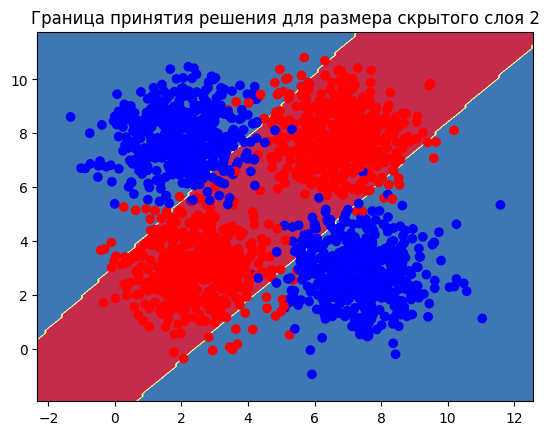

In [32]:
# Построение границы решения.
plot_decision_boundary(predict, parameters, X, Y)
plt.title("Граница принятия решения для размера скрытого слоя " + str(n_h))
plt.show()

Таким образом, более сложные задачи классификации могут быть решены с помощью нейронной сети с двумя слоями.

<a name='4'></a>
## 4 - Другой набор данных

Создим немного другой набор данных:

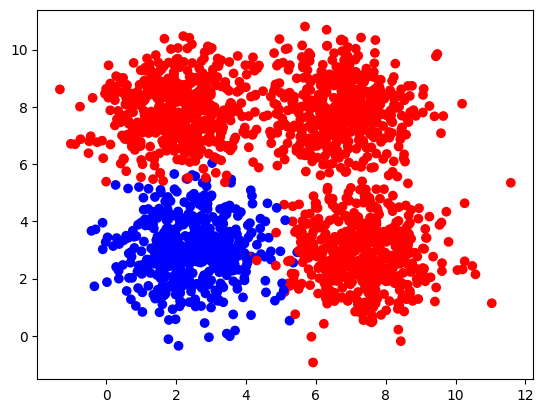

In [33]:
n_samples = 2000
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]), 
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0)] = 0
labels[(labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 1
X_2 = np.transpose(samples)
Y_2 = labels.reshape((1,n_samples))

plt.scatter(X_2[0, :], X_2[1, :], c=Y_2, cmap=colors.ListedColormap(['blue', 'red']));
plt.show()

Обратите внимание, что при построении вашей нейронной сети, количество узлов в скрытом слое может быть задано как параметр. Попробуйте изменить этот параметр и исследовать результаты:

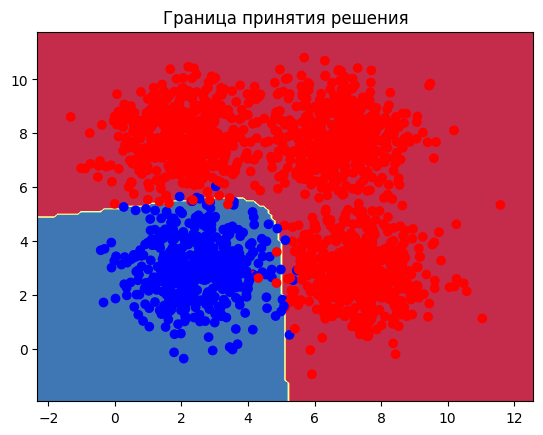

In [34]:
# parameters_2 = nn_model(X_2, Y_2, n_h=1, num_iterations=3000, learning_rate=1.2, print_cost=False)
parameters_2 = nn_model(X_2, Y_2, n_h=2, num_iterations=3000, learning_rate=1.2, print_cost=False)
# parameters_2 = nn_model(X_2, Y_2, n_h=15, num_iterations=3000, learning_rate=1.2, print_cost=False)

# Эта функция вызовет функцию predict 
plot_decision_boundary(predict, parameters_2, X_2, Y_2)
plt.title("Граница принятия решения")
plt.show()

Можно заметить, что есть несколько неправильно классифицированных точек - реальные наборы данных обычно линейно неразделимы, и будет небольшой процент ошибок. Более того, мы не хотим строить модель, которая слишком точно соответствует конкретному набору данных - она может не предсказать будущие наблюдения. Эта проблема известна как **переобучение**.